In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_events = pd.read_csv('events_train.csv')
df_purchases = pd.read_csv('purchases_train.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_events[:3]

,customer_id,timestamp,event_type,product_id,title,category_name,price
0,204685f9-00f0-4a36-bab1-e0b74673c3b1,2019-07-01 00:00:01.101977 UTC,view_item,f130c542-d793-41d0-88f6-d1c52b4fe8f0,Michael Kors Nappa Leather Racer Jacket,NaN,747.49
1,552445a5-f41d-4b25-b479-4e776d9bee61,2019-07-01 00:00:01.901589 UTC,view_item,29db8f57-49bd-4108-a0bb-0d245278e999,Puma Woven Shorts Girls,NaN,11.92
2,fac01f48-a03a-41f2-acd5-b5f4e407d9c2,2019-07-01 00:00:08.954928 UTC,view_item,a90bddc4-8eb7-4c99-aa4f-2f2377c246a2,Trendyol Multi-colored Flywheel Detailed Swimwear,NaN,23.85


In [4]:
df_purchases[:3]

,customer_id,timestamp,event_type,product_id,title,category_name,price
0,0d1b7397-7d3c-44c0-9efc-d38bf197828b,2019-07-01 00:05:54.308966 UTC,purchase_item,954f9f2c-d3ca-4236-ac9a-4ea7bcf09305,Trendyol Leopard print Bikini bottom,NaN,NaN
1,81ccae7e-e496-4997-a289-4669bf53f33e,2019-07-01 00:20:03.404186 UTC,purchase_item,75b281e5-8a16-42cb-9ae0-9a98db7a2c40,No Fear Reflect Shorts Mens,NaN,NaN
2,50777c55-8dd6-4309-a5ca-26e66c8a8279,2019-07-01 00:34:35.989935 UTC,purchase_item,0112dec8-47f5-4c2c-9109-571e2dbb6345,Trendyol Multicolor camisole Blouse,NaN,NaN


In [5]:
def get_unique_counts(df, columns):
    print('Unique value counts per column:')
    for column in columns:
        print('{:<25}{:>}'.format('Unique ' + column + 's:', len(df[column].unique())))

## Events

In [6]:
df_events.shape

(14614385, 7)

In [7]:
get_unique_counts(df_events, ['event_type', 'product_id', 'title', 'category_name'])

Unique value counts per column:
Unique event_types:      1
Unique product_ids:      123724
Unique titles:           71438
Unique category_names:   714


##### Extract gender, clothes types?

In [8]:
df_events.category_name.unique()[:10]

array([nan, "Women>Women's Clothing>Dresses>Maxi dress",
       "Women>Women's Clothing>Dresses>Mini dress",
       "Women>Women's Footwear>Balerinas",
       "Women>Women's Clothing>Dresses>Midi dress",
       "Women>Women's Clothing>Shirts>Checkered shirts",
       'Men>Men Clothing>Shorts', 'Delivery Immediately',
       "Women>Women's Clothing>Dresses>Casual Dress",
       "Women>Women's Clothing>Dresses>Wedding dress"], dtype=object)

In [9]:
df_events.price.describe().apply(lambda x: format(x, 'f'))

count    14614385.000000
mean           33.268690
std           122.109854
min             0.060000
25%            12.730000
50%            22.050000
75%            39.750000
max         32636.460000
Name: price, dtype: object

In [10]:
df_events[df_events.price > 1000].shape

(1668, 7)

## Purchases

In [11]:
df_purchases.shape

(188712, 7)

In [12]:
get_unique_counts(df_purchases, ['event_type', 'product_id', 'title', 'category_name'])

Unique value counts per column:
Unique event_types:      1
Unique product_ids:      33613
Unique titles:           19289
Unique category_names:   629


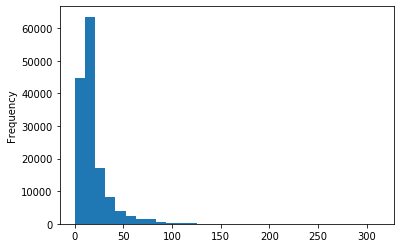

In [13]:
df_purchases.price.plot.hist(bins=30)

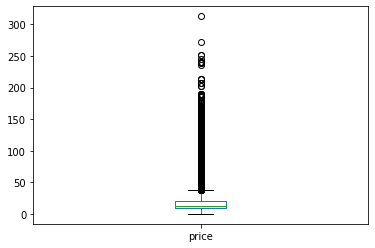

In [14]:
df_purchases.price.plot.box()

#### Notes:

- kategoriu rozparsovat na viacero stlpcov
- TF-IDF na title
- titlov je menej ako ID, casto je rovnaky nazov ale ine id, kedze sa mozu lisit vo farbe
- tam kde chybaju data sa pozerat, ci nahodou rovnaky produkt niekde inde v datach nema doplnenu price/category_name aby som doplnil chybajuce
- ak nemam aj tak najdene chybajuce hodnoty, skusat z rovnakej kategorie doplnit priemer a pod.
- povedal som ze sa chcem zamerat na hladiny cien, kategorie, TF-IDF titles
- on povedal aby som sa pozrel na vztahmi medzi kategoriami, tj ked niekto kupoval hento tak potom casto kupil toto
- data spojit, su rovnake ale proste prisli v rozdielnych suboroch